In [7]:
import pandas as pd

# Загрузка файла HR.csv в DataFrame
df = pd.read_csv('HR.csv')
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [9]:
# Расчет основных статистик
statistics = {
    'Среднее': df.mean(numeric_only=True),
    'Медиана': df.median(numeric_only=True),
    'Мода': df.mode(numeric_only=True).iloc[0],  # мода может быть не одна, поэтому берем первую
    'Минимум': df.min(numeric_only=True),
    'Максимум': df.max(numeric_only=True),
    'Среднеквадратическое отклонение': df.std(numeric_only=True)
}

# Создание DataFrame с результатами
statistics_df = pd.DataFrame(statistics)

# Вывод статистик
print(statistics_df)


                          Среднее  Медиана    Мода  Минимум  Максимум  \
satisfaction_level       0.612834     0.64    0.10     0.09       1.0   
last_evaluation          0.716102     0.72    0.55     0.36       1.0   
number_project           3.803054     4.00    4.00     2.00       7.0   
average_montly_hours   201.050337   200.00  135.00    96.00     310.0   
time_spend_company       3.498233     3.00    3.00     2.00      10.0   
Work_accident            0.144610     0.00    0.00     0.00       1.0   
left                     0.238083     0.00    0.00     0.00       1.0   
promotion_last_5years    0.021268     0.00    0.00     0.00       1.0   

                       Среднеквадратическое отклонение  
satisfaction_level                            0.248631  
last_evaluation                               0.171169  
number_project                                1.232592  
average_montly_hours                         49.943099  
time_spend_company                            1.460136  


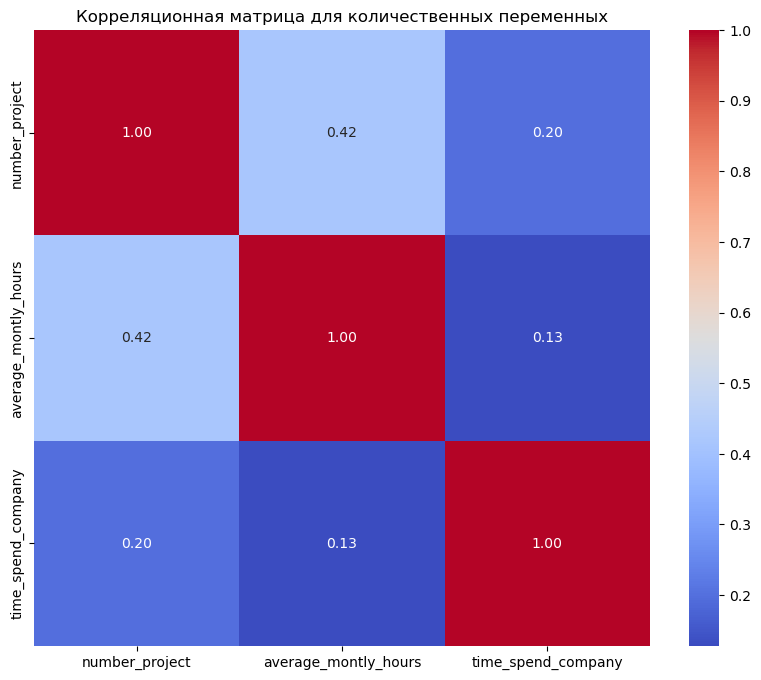

Две наиболее скоррелированные переменные:
('number_project', 'average_montly_hours') 0.41721063440177986

Две наименее скоррелированные переменные:
('average_montly_hours', 'time_spend_company') 0.1277549103618603


In [18]:
import numpy as np

# Выбираем только количественные переменные
quantitative_vars = df[['number_project', 'average_montly_hours', 'time_spend_company']]

# Рассчитываем корреляционную матрицу
correlation_matrix = quantitative_vars.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Корреляционная матрица для количественных переменных')
plt.show()

# Найдем две самые скоррелированные переменные
max_corr = correlation_matrix.unstack().sort_values(ascending=False)
max_corr = max_corr[max_corr < 1]  # Исключаем единицы (полная корреляция с самим собой)
max_corr_vars = max_corr.idxmax()
max_corr_value = max_corr.max()
print("Две наиболее скоррелированные переменные:")
print(max_corr_vars, max_corr_value)

# Найдем две наименее скоррелированные переменные
min_corr = correlation_matrix.unstack().sort_values(ascending=True)
min_corr_vars = min_corr.idxmin()
min_corr_value = min_corr.min()
print("\nДве наименее скоррелированные переменные:")
print(min_corr_vars, min_corr_value)


In [19]:
# Рассчитываем количество сотрудников в каждом департаменте
employees_per_department = df['department'].value_counts()

# Выводим результат
print(employees_per_department)


sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


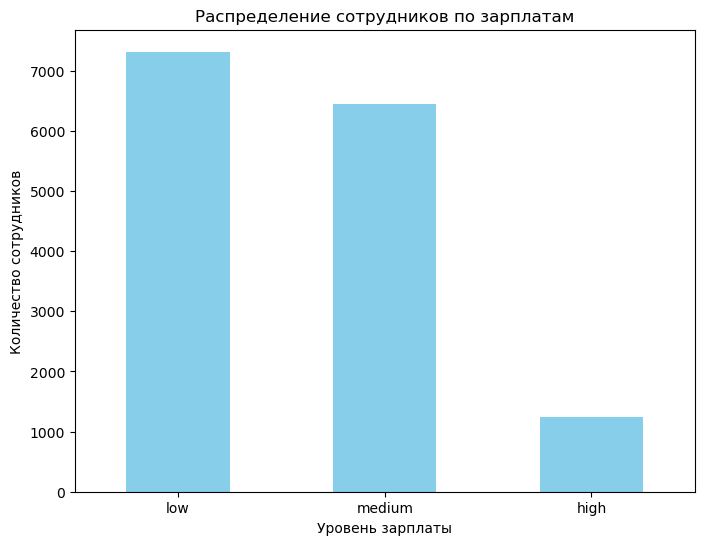

In [20]:
# Рассчитываем количество сотрудников по зарплатам
salary_distribution = df['salary'].value_counts()

# Строим гистограмму
plt.figure(figsize=(8, 6))
salary_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам')
plt.xticks(rotation=0)
plt.show()


<Figure size 1200x800 with 0 Axes>

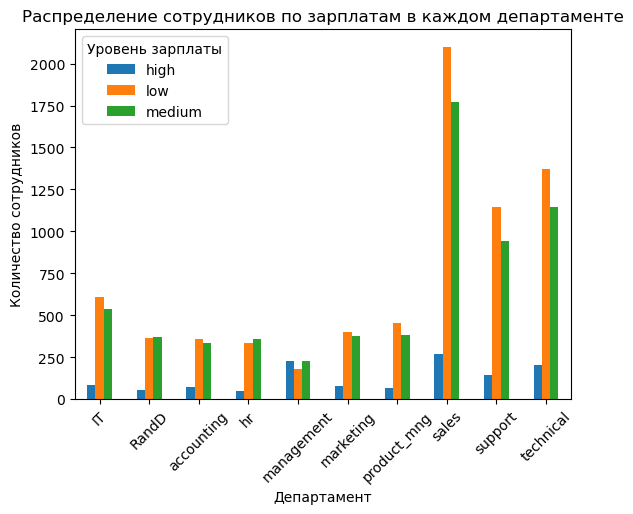

In [21]:
# Группируем данные по департаменту и уровню зарплаты
salary_per_department = df.groupby(['department', 'salary']).size().unstack()

# Строим график
plt.figure(figsize=(12, 8))
salary_per_department.plot(kind='bar')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.xticks(rotation=45)
plt.legend(title='Уровень зарплаты')
plt.show()


In [23]:
from scipy import stats

# Выбираем данные для сотрудников с высоким и низким окладом
high_salary_hours = df[df['salary'] == 'high']['average_montly_hours']
low_salary_hours = df[df['salary'] == 'low']['average_montly_hours']

# Проводим t-тест
t_statistic, p_value = stats.ttest_ind(high_salary_hours, low_salary_hours)

# Печатаем результаты t-теста
print("Результаты t-теста:")
print("Значение t-statistic:", t_statistic)
print("p-value:", p_value)

# Проверяем уровень значимости
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: сотрудники с высоким окладом проводят больше времени на работе.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: нет статистически значимых различий.")


Результаты t-теста:
Значение t-statistic: -0.7288680398062308
p-value: 0.4661023478267259
Не удалось отвергнуть нулевую гипотезу: нет статистически значимых различий.


In [25]:
# Группируем данные по статусу увольнения
grouped_by_left = df.groupby('left')

# Рассчитываем указанные показатели для каждой группы
indicators = grouped_by_left.agg({
    'promotion_last_5years': 'mean',
    'satisfaction_level': 'mean',
    'number_project': 'mean'
})

# Добавляем подписи для удобства чтения
indicators.index = ['Не уволился', 'Уволился']

# Выводим результаты
print("Показатели среди сотрудников:")
print(indicators)



Показатели среди сотрудников:
             promotion_last_5years  satisfaction_level  number_project
Не уволился               0.026251            0.666810        3.786664
Уволился                  0.005321            0.440098        3.855503


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Удалим ненужные столбцы: 'department' и 'salary'
df.drop(['department', 'salary'], axis=1, inplace=True)

# Разделяем данные на признаки (X) и целевую переменную (y)
X = df.drop('left', axis=1)  # Признаки
y = df['left']  # Целевая переменная

# Разделяем данные на обучающую и тестовую выборки (80% на обучение, 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Предсказываем увольнение на тестовой выборке
y_pred = lda.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Точность (Accuracy) модели: {:.2f}%".format(accuracy * 100))
print("\nОтчет о классификации:")
print(classification_rep)


Точность (Accuracy) модели: 75.33%

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000

